In [182]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt

In [183]:
# Configurando o tamanho padrão dos gráficos

plt.rcParams['figure.figsize'] = (11,7)

In [210]:
# Carregando os dados necessarios

tabelas = ['STG_OPR_ITT.xlsx', 'STG_MDL.xlsx']

dados_STG_OPR_ITT = pd.read_excel(tabelas[0])
dados_STG_MDL = pd.read_excel(tabelas[1])

In [191]:
# Verificando os tipos dos dados inseridos

dados_STG_OPR_ITT.dtypes

ID_STG_OPR_ITT       int64
VLR_CTRD_CSC       float64
QTD_PCL              int64
VLR_SDO_DDR        float64
QTD_CLI_CAD_POS      int64
QTD_OPR              int64
ID_FNT_ITT           int64
ID_MDL              object
DES_TIP_PSS         object
DAT_RSS_FNT_ITT     object
DAT_INC_DBO         object
dtype: object

In [192]:
nome_colunas = dados_STG_OPR_ITT.columns

linhas = dados_STG_OPR_ITT.shape[0]
colunas = dados_STG_OPR_ITT.shape[1]

print('-' * 60)

print(f'A tabela {tabela} tem {linhas} linhas e {colunas} colunas.')

print('-' * 60)

print('Contendo as colunas: ')
for indice, coluna in enumerate(nome_colunas): 
    print(f'{indice} - {coluna}')
    
print('-' * 60)

------------------------------------------------------------
A tabela STG_OPR_ITT.xlsx tem 891 linhas e 11 colunas.
------------------------------------------------------------
Contendo as colunas: 
0 - ID_STG_OPR_ITT
1 - VLR_CTRD_CSC
2 - QTD_PCL
3 - VLR_SDO_DDR
4 - QTD_CLI_CAD_POS
5 - QTD_OPR
6 - ID_FNT_ITT
7 - ID_MDL
8 - DES_TIP_PSS
9 - DAT_RSS_FNT_ITT
10 - DAT_INC_DBO
------------------------------------------------------------


In [189]:
# Convertendo todos os valores para acrescentar dois decimais

colunas = ['VLR_CTRD_CSC', 'VLR_SDO_DDR']

for coluna in colunas:
    print('-' * 60)
    for antes in dados_STG_OPR_ITT[coluna].dropna():
        depois = antes * 0.01
        print(f'R${depois:>14.2f}')
        dados_STG_OPR_ITT[coluna] = dados_STG_OPR_ITT[coluna].replace(antes, depois)
    print('-' * 60)

------------------------------------------------------------
R$     242311.68
R$     837200.00
R$    4534094.14
R$    8318873.55
R$    1687200.00
R$     322324.54
R$    5760952.64
R$    5288794.11
R$    4953127.77
R$   67084212.43
R$    8329055.87
R$    2102631.68
R$    1120050.00
R$    5018401.53
R$    1003047.99
R$    1853737.58
R$     871900.00
R$    2193174.84
R$     985800.00
R$     718550.00
R$    2156000.00
R$    6401621.38
R$    2380857.36
R$     498000.00
R$    1937200.00
R$    6223088.46
R$    1204100.00
R$    1892624.70
R$    1049894.94
R$    4778759.38
R$    3337500.00
R$     596620.71
R$    2741550.00
R$    2020700.00
R$     623000.00
R$    4800565.00
R$     322100.00
R$    1854701.57
R$    6514123.68
R$    1882100.00
R$    2722465.75
R$    2482293.05
R$     726000.00
R$    1379500.00
R$    5014565.30
R$    1893250.00
R$    4193268.22
R$    5785679.36
R$    1386700.00
R$    5258481.68
R$    3060163.91
R$    1766561.30
R$    2059500.00
R$    1519370.53
R$   11385998.30
R$  

In [193]:
# Total de operações por modalidades (mais usadas)

temp = dados_STG_OPR_ITT['ID_MDL'].dropna()

mdl_mais_usadas = temp.value_counts(ascending = False)
mdl_mais_usadas

B03    214
C01    186
A01    122
A04    112
B99    104
B05     71
A99     35
A05     20
B01     19
B06      4
B07      2
F01      1
G01      1
Name: ID_MDL, dtype: int64

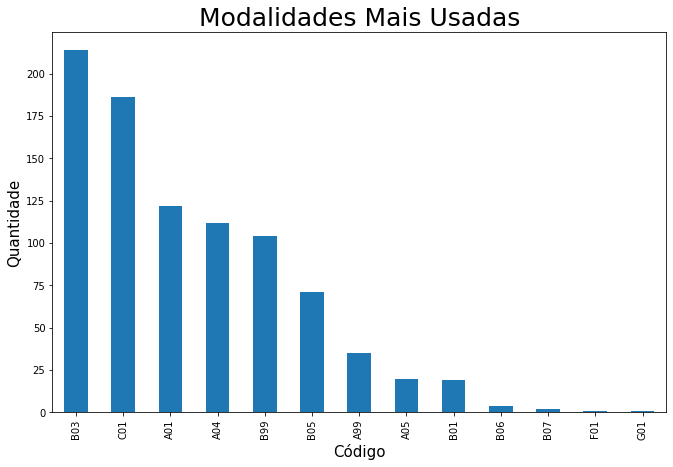

In [194]:
# Criando um gráfico para ficar mais visível.

mdl_mais_usadas.plot.bar();

plt.title("Modalidades Mais Usadas", size=25); # Adicionando um título
plt.xlabel('Código', size=15); # Nomeando o eixo X
plt.ylabel('Quantidade', size=15); # Nomeando o eixo Y

In [195]:
# Soma das Operações por Modalidades.

temp = dados_STG_OPR_ITT[['ID_MDL', 'QTD_OPR']].dropna()

soma_opr_por_mdl = temp.groupby(['ID_MDL']).sum().sort_values(by = 'QTD_OPR', ascending = False)
soma_opr_por_mdl

,QTD_OPR
ID_MDL,
A04,411896
A01,181711
B99,115480
B05,30366
A99,15067
C01,12509
G01,11850
B03,4331
A05,1482


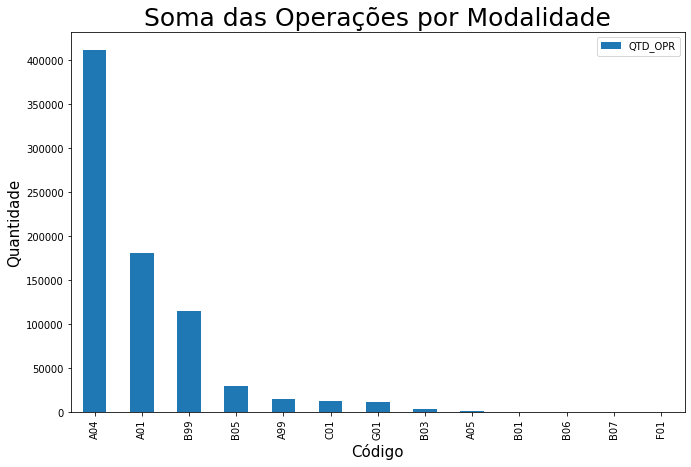

In [206]:
# Criando um grafico para ficar mais visivel

soma_opr_por_mdl.plot.bar()

plt.title("Soma das Operações por Modalidade", size=25); # Adicionando um título
plt.xlabel('Código', size=15); # Nomeando o eixo X
plt.ylabel('Quantidade', size=15); # Nomeando o eixo Y
plt.legend()

In [197]:
# Soma das Parcelas por Modalidades.

temp = dados_STG_OPR_ITT[['ID_MDL', 'QTD_PCL']].dropna()

soma_parcela_por_mdl = temp.groupby(['ID_MDL']).sum().sort_values(by = 'QTD_PCL', ascending = False)
soma_parcela_por_mdl

,QTD_PCL
ID_MDL,
B03,49467
C01,20139
A01,7563
A04,7447
B99,5522
B05,2583
A99,630
A05,287
B01,230


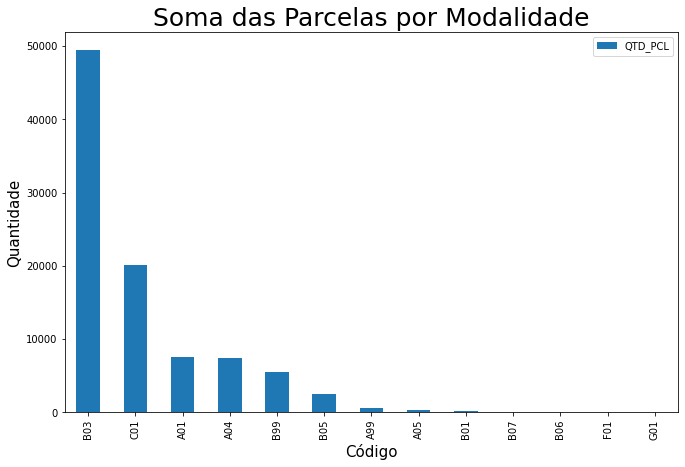

In [198]:
# Criando um grafico para ficar mais visivel

soma_parcela_por_mdl.plot.bar()

plt.title("Soma das Parcelas por Modalidade", size=25); # Adicionando um título
plt.xlabel('Código', size=15); # Nomeando o eixo X
plt.ylabel('Quantidade', size=15); # Nomeando o eixo Y